# Task 1:  Prediction of heart Disease 

In [339]:
# importing Important libraries....
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

In [255]:
# Data Loading into Jupyter Notebook
df = pd.read_csv(r"C:\Users\vedan\Downloads\heart.csv")
print(len(df))
df.head()

1025


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Random Sample From DataSet

In [256]:
df.sample(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
756,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
549,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
184,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
874,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
235,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
754,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1


---

##  Data Processing 

In [257]:
summary = df.describe()
summary

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [258]:
# Counting Up missing nan Value in each columnn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


C:\Users\vedan\AppData\Local\Temp\ipykernel_17692\2486705937.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

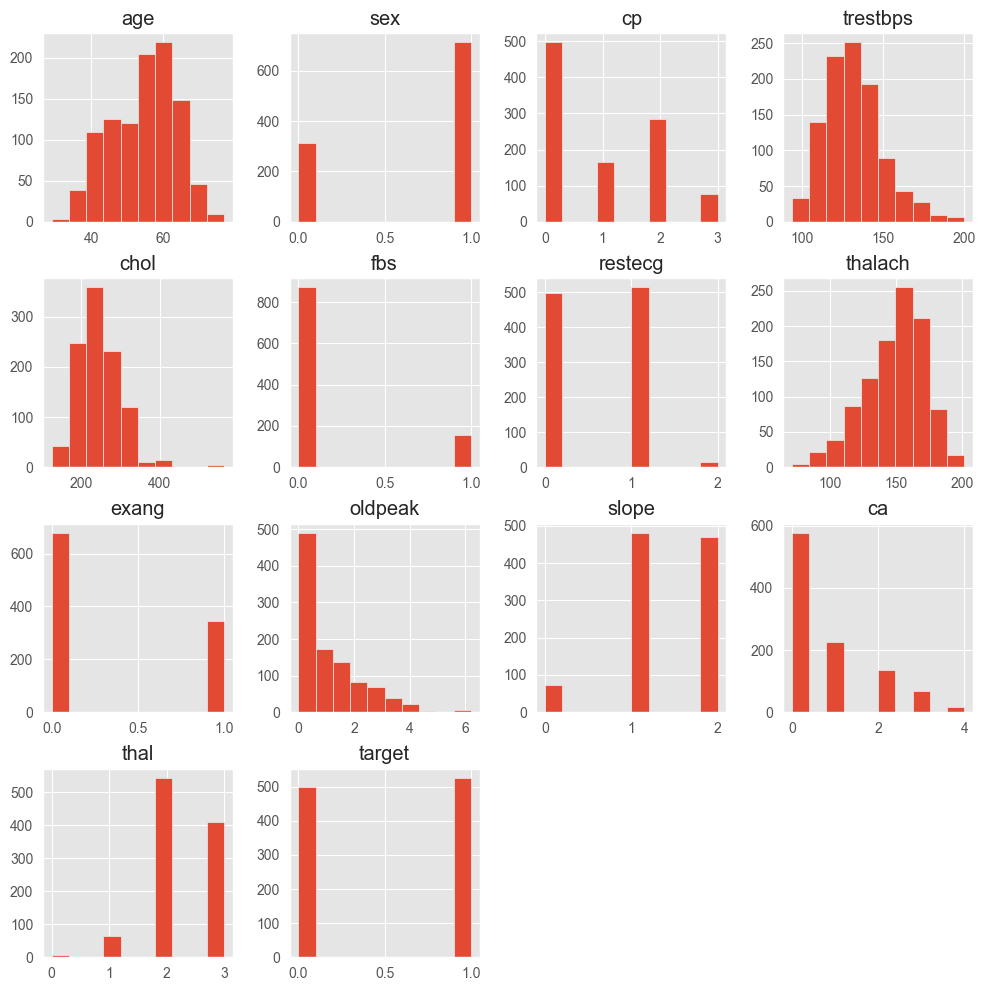

In [259]:
fig,ax=plt.subplots(figsize=(12,12))
df.hist(ax=ax)

---

## EDA (exploratory data analysis)

Target

In [260]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


target
1    526
0    499
Name: count, dtype: int64


C:\Users\vedan\AppData\Local\Temp\ipykernel_17692\740187465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x='target',palette="flare")


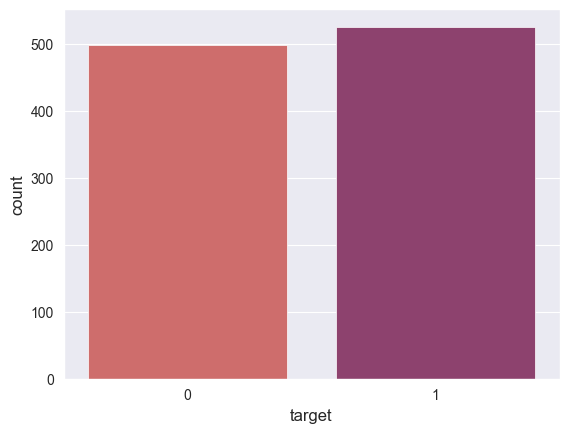

In [261]:
sns.set_style(style='darkgrid')
sns.countplot(data = df, x='target',palette="flare")
target_count = df.target.value_counts()
y = df["target"]
print(target_count)

In [262]:
print("Percentage of patience without heart problems: ", round(target_count[0]*100/1025,2),"%")
print("Percentage of patience with heart problems: ", round(target_count[1]*100/1025,2),"%")


Percentage of patience without heart problems:  48.68 %
Percentage of patience with heart problems:  51.32 %


---

C:\Users\vedan\AppData\Local\Temp\ipykernel_17692\996967744.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["cp"],palette="flare")


cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

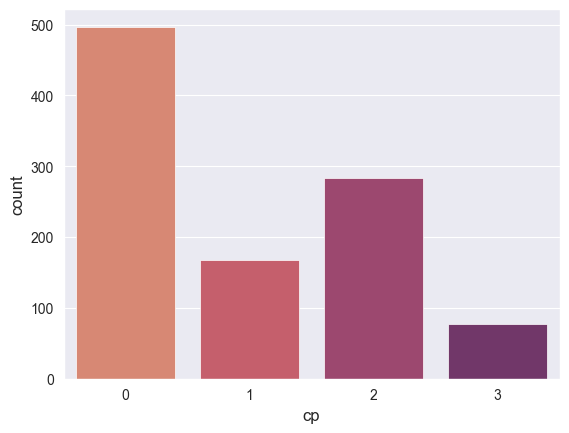

In [263]:
 sns.countplot(x=df["cp"],palette="flare")
ct = df["cp"].value_counts()
ct

C:\Users\vedan\AppData\Local\Temp\ipykernel_17692\350090070.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df["cp"], y = y,palette="flare")


<Axes: xlabel='cp', ylabel='target'>

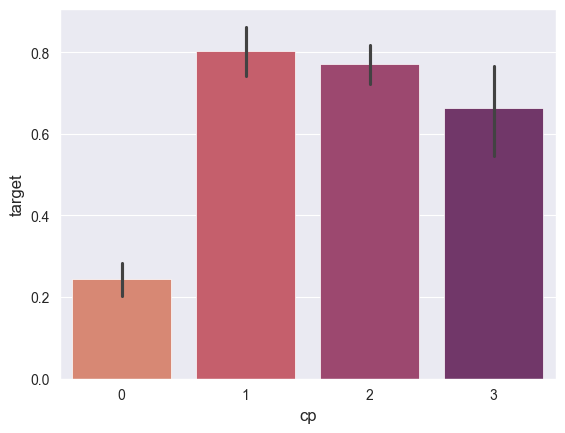

In [264]:
sns.barplot(x = df["cp"], y = y,palette="flare")

---

C:\Users\vedan\AppData\Local\Temp\ipykernel_17692\3872998204.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df["ca"],palette="flare")


<Axes: xlabel='ca', ylabel='count'>

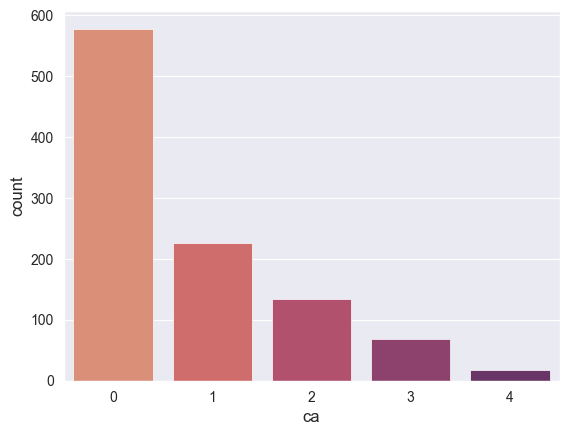

In [265]:
sns.countplot(x = df["ca"],palette="flare")

C:\Users\vedan\AppData\Local\Temp\ipykernel_17692\3203353121.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['ca'],y=y,palette="flare")


<Axes: xlabel='ca', ylabel='target'>

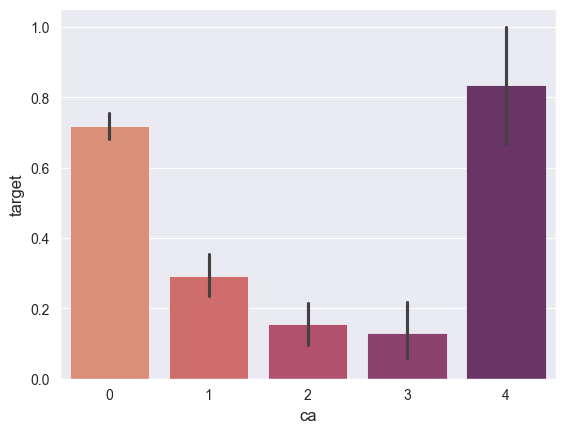

In [266]:
sns.barplot(x=df['ca'],y=y,palette="flare")

<Axes: >

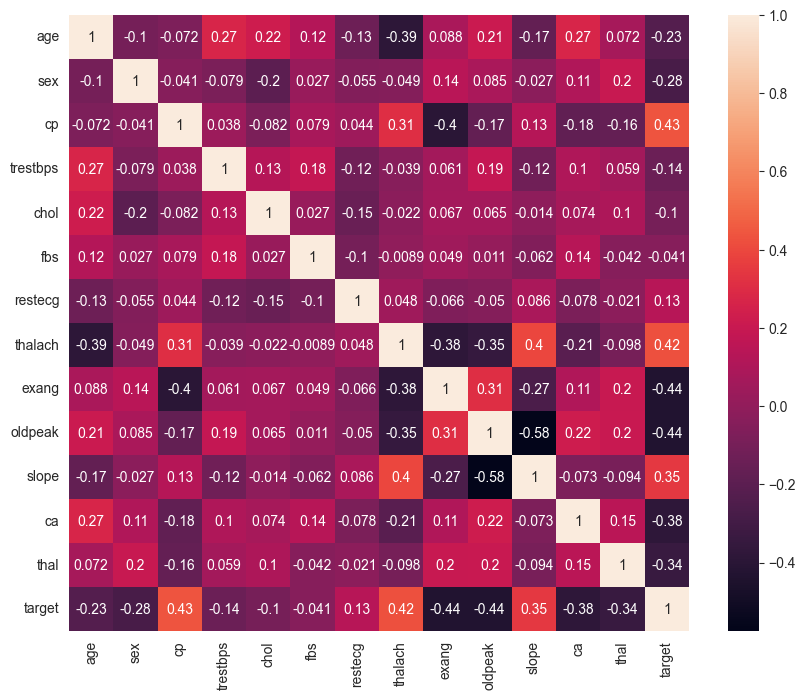

In [267]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

#### Data insights

sex
1    713
0    312
Name: count, dtype: int64


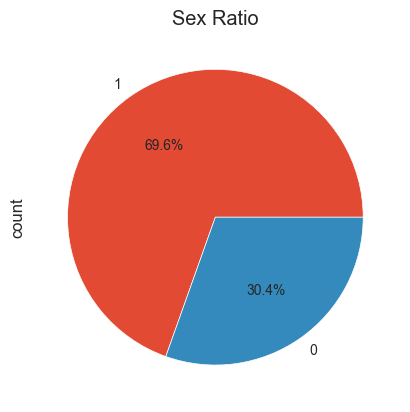

In [268]:
# sex Ratio 
sex_count = df['sex'].value_counts()
print(sex_count)
sex_count.plot(kind='pie',title='Sex Ratio', autopct='%1.1f%%')
plt.show()


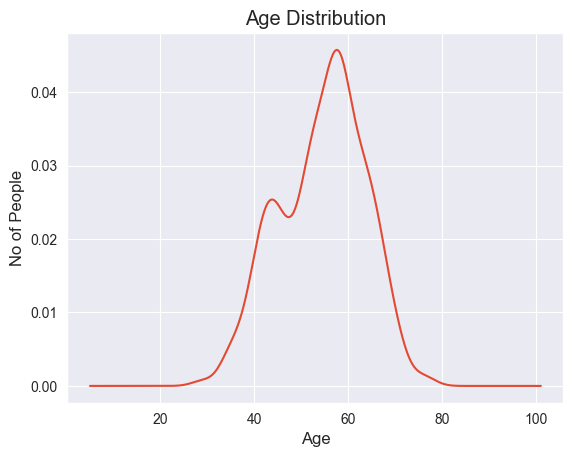

In [269]:
# Age counts

age_count = df['age'].value_counts().head(10)
age_count = pd.DataFrame(age_count)    
### Its a DataFrame Now
age_count_sorted = age_count.sort_values(by = ['age'])
# print(age_count_sorted)
# age_count_sorted.plot(kind='bar')


df['age'].plot(kind='kde')
plt.xlabel('Age')
plt.ylabel('No of People')
plt.title('Age Distribution')
plt.show()


### Age vs Chol 

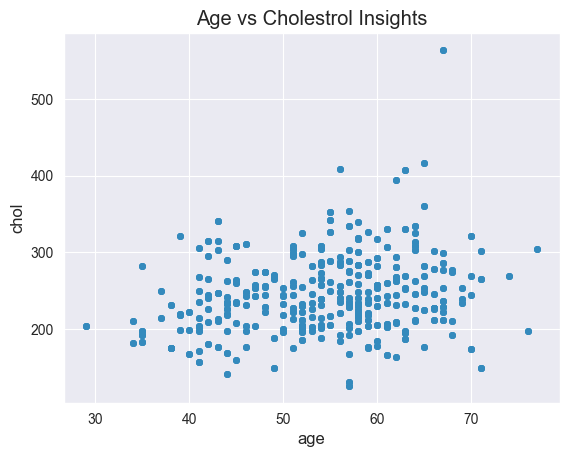

In [270]:
df.plot(kind='scatter',
       x='age',
       y='chol',
       title='Age vs Cholestrol Insights')
plt.show()

### Age vs Colestrol vs Sex

<Axes: xlabel='age', ylabel='chol'>

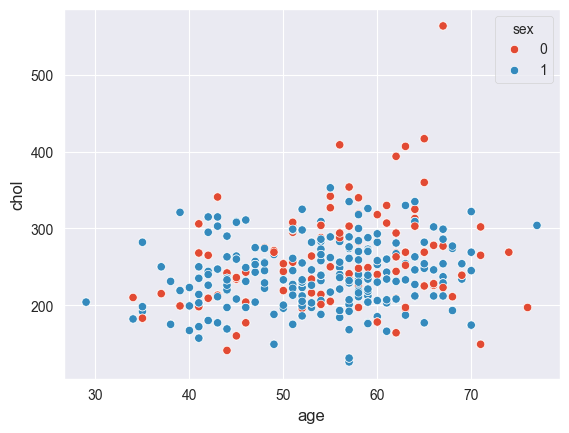

In [271]:
# Insights Using Seaborn  ( 3 Variable )  

sns.scatterplot(x='age',
                y= 'chol',
               hue = 'sex',
               data = df)

---

## Training Model

In [272]:
attribute = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

# creating independent and Dependent Variable
X = df[attribute].copy()
y = df['target']
y

from sklearn.model_selection import train_test_split

predictors = df.drop("target",axis=1)
target = df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [273]:
X_train.shape

(820, 13)

In [274]:
X_test.shape

(205, 13)

In [275]:
Y_train.shape

(820,)

In [276]:
Y_test.shape

(205,)

## Scaling DataSet

In [277]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


---

# Model Evaluation  

## 1) K-Nearest Neighbor

In [326]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [327]:
Y_pred_knn = classifier.predict(X_test)
# print(y_pred)

In [328]:
classifier.score(X_train,Y_train)

0.9585365853658536

#### Finding best n_neighbor Value

Text(0.5, 1.0, 'Error_Rate Vs K')

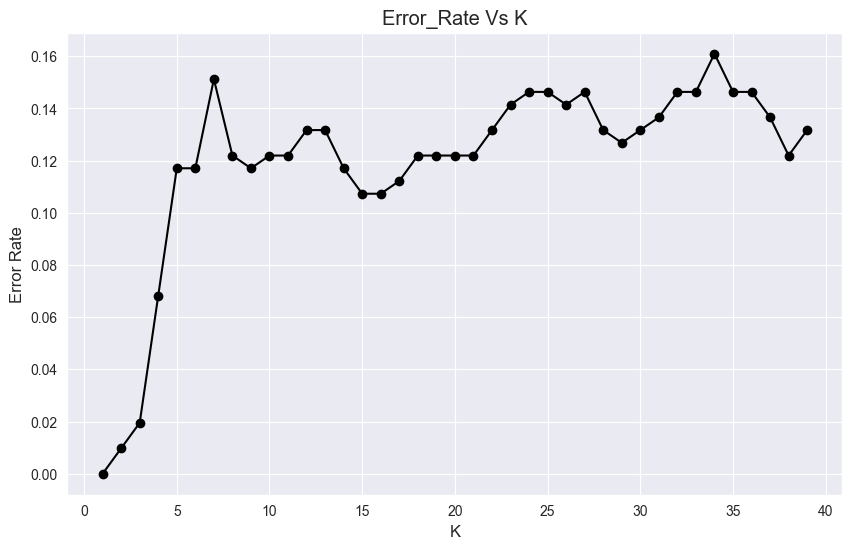

In [329]:
error_rate=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != Y_test))

from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,marker='o',color='black')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error_Rate Vs K')

From the above Insight can conclude Best Value 'n_neighbors = 1'

---

In [330]:
# prediction for n_neighbors = 5
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(Y_test,Y_pred_knn))

Confusion Matrix:
[[84 14]
 [10 97]]


In [331]:
# Printing report of the prediction
print(classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        98
           1       0.87      0.91      0.89       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [332]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("Accuracy Using K_Nearest_model: "+str(score_knn)+" %")

Accuracy Using K_Nearest_model: 88.29 %


---

## 2) Logistic Regression

In [333]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [334]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("Accuracy Using Logistic Regression: "+str(score_lr)+" %")

Accuracy Using Logistic Regression: 86.34 %


---

## 3) Naive Bayes

In [335]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

In [336]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("Accuracy Using Naive_Bayes: "+str(score_nb)+" %")

Accuracy Using Naive_Bayes: 85.37 %


---

## 3) Decision Tree

In [337]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)



dt = DecisionTreeClassifier(random_state=2)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

100.0
0


In [338]:
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(tree, X_train, Y_train, cv=5)
print(f"Cross-validation scores: {scores}")

print(f"Mean cross-validation score: {scores.mean()}")
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)


Cross-validation scores: [0.90243902 0.91463415 0.86585366 0.89634146 0.8597561 ]
Mean cross-validation score: 0.8878048780487806


#### OverFitting 

---

OutPuts

C:\Users\vedan\AppData\Local\Temp\ipykernel_17692\1132395485.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = models, y = scores, palette = 'flare')


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

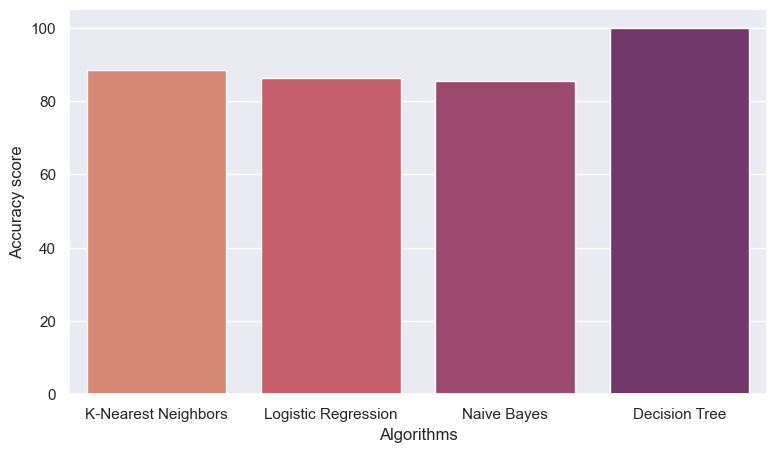

In [359]:
scores = [score_knn,score_lr,score_nb,score_dt]
sns.set(rc={'figure.figsize':(9,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

models = ["K-Nearest Neighbors","Logistic Regression","Naive Bayes","Decision Tree"]    

sns.barplot(x = models, y = scores, palette = 'flare')

## Vedant Ganesh Badukale
Indian Institute of Information Technology, Nagpur